# Coding Challenges
If you have any questions or comments about the test, feel free to email us at dkarkada@gmail.com, roger.z@utexas.edu, and siddhant.arora@utexas.edu.
We hope you enjoy the coding challenges, and good luck!

*Make sure to click **Copy to Drive** before editing (should be on the toolbar above). Your changes will not be saved otherwise.* 

**Also, remember to share with EDIT permission, or your coding challenges will not be scored.** Do not edit your coding challenges after submitting the exam on Scilympiad. (We will be comparing your Last Changes Made Time with End Time on Scilympiad.)

Before starting, run the cell below. Note that there are sample test cases at the end of the file that you can test your code on.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Problem 1: Spectral Analysis (5 points)



When telescopes look at objects in the night sky, they collect a spectrum. This means that they split up the incoming light by wavelength and measure the strength of the light at each wavelength. Then you make a plot with the wavelength on the x-axis and the light intensity on the y-axis. An image of a spectrum can be found [here](https://www.mdpi.com/atoms/atoms-06-00044/article_deploy/html/images/atoms-06-00044-g001a.png).

In that image, you can see sharp peaks at certain wavelengths. These peaks are emitted by certain elements. A very important peak occurs at 656.3 nm: this is one of the spectral signatures of atomic hydrogen and is called the H-alpha line. We will say that a spectrum contains the line if any wavelengths within 1 nm of 656.3nm have a corresponding intensity greater than 30.

Complete the function `has_Halpha_line()` below, which takes as parameters a list of wavelengths (in nanometers) and a corresponding list of intensities. Determine whether the spectrum contains an H-alpha line and return a bool.

In [5]:
def has_Halpha_line(wavelengths, spectrum):
  # uncomment the lines below to see a plot of the spectrum (this is just to help you, it's not necessary for the solution)
  # plt.plot(wavelengths, spectrum)
  # plt.show()

  for i in range(len(wavelengths)):
    if wavelengths[i] >= 655.3 and wavelengths[i] <= 657.3 and spectrum[i] > 30:
      return True
  return False

## Problem 2: Mass of a Galaxy (5 points)

In astronomy, the virial theorem can be applied to state that for any stable, self-gravitating system with equal-mass objects, the kinetic energy of the system equals two times the gravitational potential energy. When you substitute in values for each of these quantities, you can approximate the mass of certain galaxies to be
$$ M_{\text{tot}} = \frac{R_{\text{tot}}v^2}{G}, $$
where $M_{\text{tot}}$ is the total mass of the galaxy, $R_{\text{tot}}$ is the effective radius of the galaxy, $v^2$ is the mean squared velocity of the objects in the galaxy (commonly known as dispersion velocity), and $G$ is Newton's Gravitational constant.

Using this formula, complete `calculate_galaxy_masses()` below. Data is passed to the function as a **list** of dictionaries, where each dictionary contains the effective radius of a galaxy, a list of velocities of objects in that galaxy, and the gravitational constant. The function should return a list of numbers representing each galaxy's mass in the same order that it was passed to the function. Below is an example of what a single dictionary should look like: </br>
$$
\begin{align}
\texttt{galaxy1} \text{ = } &\{ \\
&``V": [7.2 × 10^{4}, 5.8 × 10^{4}, 9 × 10^{4}],\newline
&``R": 5 × 10^{20}, \newline
&``G": 6.67 × 10^{-11} \newline
&\}
\end{align}
$$
You do not need to worry about unit conversions.

In [6]:
def calculate_galaxy_masses(galaxies):
  masses = []
  for d in galaxies:
    vsq = 0
    for v in d['V']:
        vsq += v**2
    meanvsq = (vsq / len(d['V']))
    masses.append(d['R'] * meanvsq / d['G'])
  return masses

## Problem 3: Triangle Meshes (10 points)









In computer graphics, 3D objects are often modeled with triangle meshes because of their time and space efficiency. Specifically in astronomy, triangle meshes are useful for searching for stars, galaxies, and extraterrestial objects within a spherical region in the sky. 

In these meshes, the three vertices of a triangle are also always coplanar. Thus, we can easily check if a random point in space lies on the surface of a triangle mesh. This coding challenge is somewhat related to this concept, except on the 2D plane.

In this problem, the first parameter of the input is a list of 2D triangles. Each triangle takes the form of a tuple of 3 tuples $((x_1, y_1),(x_2, y_2),(x_3, y_3))$, which represent the coordinates of the vertices. The second parameter of the input is list of points $(x, y)$ on the plane. For each of the points in this list, determine the number of triangles that the point is contained in.   

Your task is to complete `in_num_triangles()` below, which should return an integer representing the number of triangles in `triangles_list` that a single `point` is contained in. `solve()` is written for you, and will call `in_num_triangles()` for each point in `input_list`. Feel free to add your own helper functions. Remember that a point can be inside multiple triangles, as the triangles can overlap.


**Hint:** A point is in a triangle when the sum of 3 triangles formed by the point and two other triangle vertices is equal to the area of the original triangle. The image below exhibits this property.

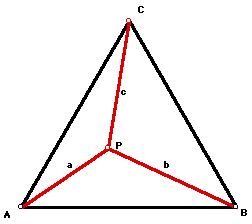

**IMPORTANT:** To ensure correctness, use `math.isclose(a, b)` to compare floating point numbers.

In [7]:
import math

def solve(triangles_list, input_list): # --> returns list of ints
    result = []
    for point in input_list:
        result.append(in_num_triangles(triangles_list, point))
    return result

def in_num_triangles(triangles_list, point): # --> returns int
  count = 0
  for t in triangles_list:
    area1 = triangle_area((t[0], t[1], point))
    area2 = triangle_area((t[1], t[2], point))
    area3 = triangle_area((t[2], t[0], point))
    total_area = triangle_area(t)
    if (math.isclose(area1 + area2 + area3, total_area)):
      count += 1
  return count

def triangle_area(triangle): # --> returns float
  s1 = dist(triangle[0], triangle[1])
  s2 = dist(triangle[1], triangle[2])
  s3 = dist(triangle[2], triangle[0])
  semi = (s1 + s2 + s3) / 2
  return math.sqrt(semi * (semi - s1) * (semi - s2) * (semi - s3))

def dist(t1, t2):
  return math.sqrt((t2[1] - t1[1])**2 + (t2[0]- t1[0])**2)

## Problem 4: Asteroids (20 points total)

In outer space, "proper orbital elements" are properties of a space object's orbit that remain constant over large periods of time. As a result, scientists can often differentiate between certain objects and their classes based off of these features alone. 

In the following question, we will take advantage of this property of proper orbital elements by examining an unlabeled dataset and performing k-means clustering in order to separate what we think are two different asteroid classes.

### Part 1: Statistical Analysis (8 points)

Before we implement the clustering algorithm, it's nice to do a sanity check on the data. In this section, complete  `asteroid_stats()` function, which when given a list of values, should compute the mean and standard deviation of the list and return the two values as the tuple `(mean, stdev)`. In addition to that, the method should plot the data in a histogram with 15 bins that ranges from the minimum element to the maximum element. We should be able to use this function to summarize any list of data from the asteroid dataset.

**Hint**: Remember that you can use pre-defined methods from numpy. To plot the histogram, use `matplotlib.pyplot.hist`. Note that these modules have already been imported, so there is no need to import them again.

In [9]:
def asteroid_stats(data):
  mean = 0
  stdev = 0
  mean = np.mean(data)
  stdev = np.std(data)
  print("Mean: {}".format(mean))
  print("Standard Deviation: {}".format(stdev))

  #YOUR PLOTTING CODE GOES HERE
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()

  return (mean, stdev)

### Part 2: Naive K-Means Clustering (12 points)

While a real dataset of asteroids may contain multiple properties, we are concerned with only two of them: their semi-major axes of revolution and the eccentricities of their orbit. In this question, you are given a list of tuples in the form `(semi-major axis, eccentricity)`. The goal of this program is then to split the asteroid dataset into two clusters (which we will refer to as `red` and `blue`) using the k-means clustering algorithm.

**Naive K-Means Clustering Algorithm**

The algorithm beginds by initializing labels for all asteroids (in this program, it initializes all asteroids as `red`). It also initializes two centroids, one for the `red` asteroids and one for the `blue` asteroids. Labels are stored in a list, where the $i$th label corresponds to the $i$th asteroid in the data, and the centroids are each a tuple of coordinates that are stored in a list of length 2 (in the order red, blue). Each iteration of the learning algorithm consists of the following steps:

*   Assignment Step: assign each asteroid to the label that has the closest centroid (measured using Euclidean distance) and return the new labels.
*   Update Step: after all the asteroids have been assigned to the label with the closer centroid, update the centroids so that they reflect the new data and return them.

These steps are repeated until the data converges (in this case, we have set a fixed amount of iterations).

In this problem, your task is to implement the methods  `assign_labels()` and `update_centroids()`. Each method should return an updated version of the object they are modifying. The rest of the algorithm has been written for you. Do not edit the rest of the code, and as always, you are allowed to define any helper functions you may need.

In [10]:
## DO NOT EDIT THIS CELL ##
def plot_data(data, labels, centroids):
  plt.scatter([x[0] for x in data], [x[1] for x in data], c = labels)
  plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], c = 'black', marker = '*')
  plt.xlabel('Semi-Major Axis')
  plt.ylabel('Eccentricity')
  plt.show()

def k_means_clustering(data):
    labels = ['red']*len(data) # Initialize all the labels as red
    centroids = [(30, 0.8), (30, 0.2)]
    plot_data(data, labels, centroids)  # Plot before executing the algorithm
    
    iter = 4  
    for i in range(iter):
        labels = update_labels(data, labels, centroids)
        centroids = update_centroids(data, labels, centroids)
        plot_data(data, labels, centroids)
        
    return labels

In [11]:
def update_labels(data, labels, centroids):
  for i in range(len(data)):
    dred = dist(data[i], centroids[0])
    dblue = dist(data[i], centroids[1])
    if (dred < dblue):
      labels[i] = 'red'
    else:
      labels[i] = 'blue'
  return labels

def update_centroids(data, labels, centroids):
  redX = redY = blueX = blueY = 0
  countR = countB = 0
  for i in range(len(data)):
    if (labels[i] == 'red'):
      redX += data[i][0]
      redY += data[i][1]
      countR += 1
    else:
      blueX += data[i][0]
      blueY += data[i][1]
      countB += 1
  return [(redX/countR, redY/countR), (blueX/countB, blueY/countB)]

# Scratchwork
You can use this area to create new cells if you need to test something.

# Sample Testing Data
## DO NOT EDIT!

We have provided you some sample input/output for you to test your code on (just run the cell below). Note that we will test your code on hidden test cases, so do not hard-code your solutions.

For Problem 4, the IDE cannot check to make sure your graph is correct, so it will instead check the returned values from each function.

Problem 1 Test Cases: 3/3
Problem 1: PASSED

Problem 2 Test Cases: 2/2
Problem 2: PASSED

Problem 3 Test Cases: 1/1
Problem 3: PASSED

Mean: 33.566095977
Standard Deviation: 19.615891288783466


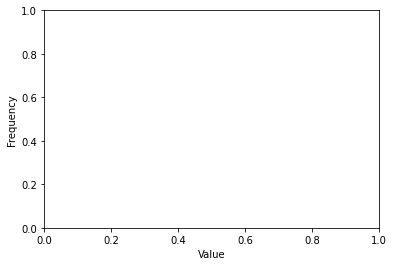

Mean: 0.306465692
Standard Deviation: 0.19253941871605237


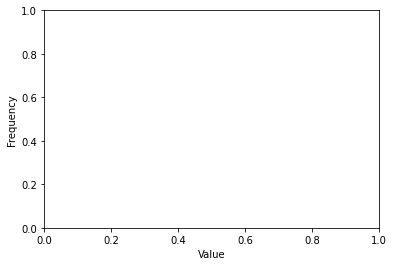

Problem 4.1 Test Cases: 2/2
Problem 4.1: PASSED



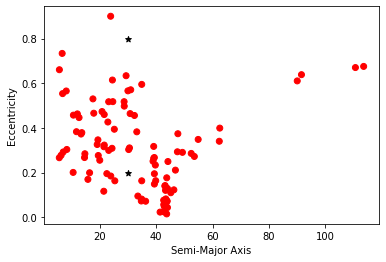

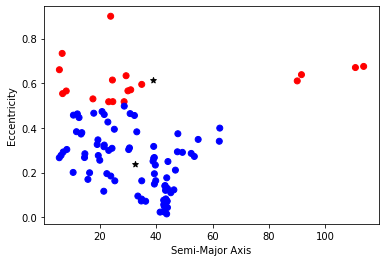

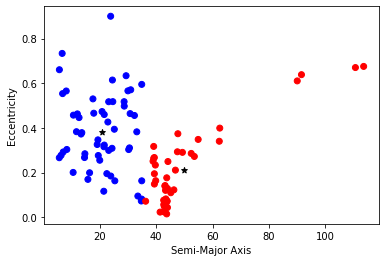

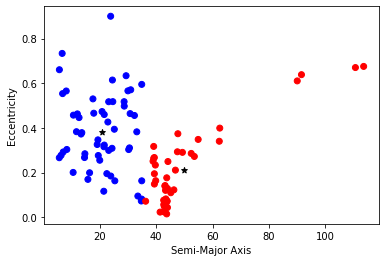

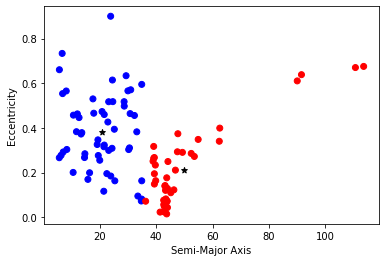

Problem 4.1 Test Cases: 1/1
Problem 4.1: PASSED



In [12]:
import numpy as np

###### TESTING CODE, PROBLEM 1 ######
test_wavelengths = [[650.0, 650.2, 650.4, 650.6, 650.8, 651.0, 651.2, 651.4, 651.6, 651.8, 652.0, 652.2, 652.4, 652.7, 652.9, 653.1, 653.3, 653.5, 653.7, 653.9, 654.1, 654.3, 654.5, 654.7, 654.9, 655.1, 655.3, 655.5, 655.7, 655.9, 656.1, 656.3, 656.5, 656.7, 656.9, 657.1, 657.3, 657.6, 657.8, 658.0, 658.2, 658.4, 658.6, 658.8, 659.0, 659.2, 659.4, 659.6, 659.8, 660.0],
                    [652.0, 652.3, 652.5, 652.8, 653.1, 653.3, 653.6, 653.9, 654.1, 654.4, 654.7, 654.9, 655.2, 655.4, 655.7, 656.0, 656.2, 656.5, 656.8, 657.0, 657.3, 657.6, 657.8, 658.1, 658.4, 658.6, 658.9, 659.2, 659.4, 659.7, 660.0, 660.2, 660.5, 660.8, 661.0, 661.3, 661.6, 661.8, 662.1, 662.3, 662.6, 662.9, 663.1, 663.4, 663.7, 663.9, 664.2, 664.5, 664.7, 665.0],
                    [652.0, 652.3, 652.6, 652.9, 653.2, 653.5, 653.8, 654.1, 654.4, 654.8, 655.1, 655.4, 655.7, 656.0, 656.3, 656.6, 656.9, 657.2, 657.5, 657.8, 658.1, 658.4, 658.7, 659.0, 659.3, 659.7, 660.0, 660.3, 660.6, 660.9, 661.2, 661.5, 661.8, 662.1, 662.4, 662.7, 663.0, 663.3, 663.6, 663.9, 664.2, 664.6, 664.9, 665.2, 665.5, 665.8, 666.1, 666.4, 666.7, 667.0]]

test_spectra = [[1.7, 59.4, 2.2, 4.0, 3.0, 3.6, 2.0, 1.5, 1.5, 1.2, 6.0, 3.0, 3.0, 6.3, 1.5, 5.3, 57.4, 1.8, 3.6, 2.7, 2.7, 5.1, 7.6, 2.9, 1.1, 2.8, 2.7, 3.8, 2.2, 1.2, 2.7, 62.1, 2.0, 1.3, 2.0, 1.3, 2.1, 2.5, 1.1, 3.8, 3.1, 2.4, 2.5, 3.4, 2.2, 4.5, 5.0, 2.1, 7.2, 1.2],
                [1.4, 0.7, 1.5, 1.7, 0.6, 1.4, 8.0, 1.4, 2.4, 1.3, 2.1, 2.7, 59.4, 6.3, 2.7, 2.0, 61.1, 8.0, 7.9, 4.9, 1.7, 1.6, 4.8, 5.3, 1.3, 2.4, 1.6, 2.0, 3.2, 3.1, 6.7, 1.9, 4.3, 2.8, 2.0, 58.0, 5.5, 3.0, 1.6, 2.6, 4.3, 2.8, 2.0, 1.0, 0.5, 1.8, 0.4, 1.9, 3.7, 4.0],
                [3.4, 3.4, 4.3, 1.4, 1.8, 2.1, 3.8, 2.1, 3.4, 5.2, 6.4, 4.8, 1.3, 3.1, 5.9, 1.3, 7.6, 1.4, 2.9, 3.2, 2.3, 3.8, 0.7, 3.2, 2.9, 1.8, 1.3, 3.6, 1.9, 1.3, 2.5, 1.0, 4.4, 57.9, 1.2, 2.7, 0.8, 4.9, 4.5, 3.5, 2.5, 2.1, 1.4, 0.6, 1.3, 4.3, 2.0, 4.7, 3.6, 0.7]]

expected_output = [True, True, False]
score = 0
for i in range(3):
  wavelengths = test_wavelengths[i]
  spectrum = test_spectra[i]
  answer = expected_output[i]
  score += (has_Halpha_line(wavelengths, spectrum) == answer)
print('Problem 1 Test Cases: ' + str(score) + '/3')
print('Problem 1: ' + ('PASSED\n') if (score == 3) else ('FAILED\n'))

###### TESTING CODE, PROBLEM 2 ######
score = 0
galaxies_cases = [
  [{'V':[5.3e5, 2.9e3, 9.8e3, 5.4e5, 1.0e5, 6.6e6], 'R':4.4e18, 'G':6.67e-11}],
  [{'V':[7.2e4,5.8e4,9e4], 'R':5e20, 'G':6.67e-11}, {'V':[4.1e3], 'R':5e20, 'G':6.67e-11}]
]
galaxies_answers = [
  [4.853259859570215e+41],
  [4.15992003998001e+40, 1.260119940029985e+38]
]
for i in range(len(galaxies_cases)):
  student = np.array(calculate_galaxy_masses(galaxies_cases[i]))
  score += np.allclose(student, np.array(galaxies_answers[i]))
print('Problem 2 Test Cases: ' + str(score) + '/2')
print('Problem 2: ' + ('PASSED\n') if (score == 2) else ('FAILED\n'))

###### TESTING CODE, PROBLEM 3 ######
score = 0
triangles_list = [((1, 2), (2, 0), (0, 0)), ((-1, -2), (-2, 0), (0, 0)), ((1, 1), (-1, 0), (0, -1))]
input_list = [(-2, -2), (1, 1), (-1.5, -1), (-0.5, -0.5), (0, 0)]
score += solve(triangles_list, input_list) == [0, 2, 1, 2, 3]
print('Problem 3 Test Cases: ' + str(score) + '/1')
print('Problem 3: ' + ('PASSED\n') if (score == 1) else ('FAILED\n'))

###### TESTING CODE, PROBLEM 4 ######
# Part 1
score = 0
test_cases = [
  [5.7360086, 13.6857055, 15.842974100000001, 11.7850661, 10.6108796, 33.162686199999996, 6.8776193, 32.337073100000005, 8.3718539, 16.4434992, 25.2035963, 10.7030821, 31.014612800000002, 34.903262700000006, 19.51817, 20.854851, 17.921319699999998, 34.7658166, 20.0449304, 17.624605600000002, 6.350806200000001, 30.018044699999997, 30.5737995, 12.1124023, 5.7053469, 21.6276383, 34.9163261, 7.109849099999999, 28.674854200000002, 13.4164751, 34.916539, 22.5490465, 23.946260100000003, 28.72308, 21.4696378, 19.1374758, 22.9157058, 29.3715797, 25.3821203, 14.645712300000001, 30.802787800000004, 24.530397100000002, 24.393262699999998, 33.5432837, 19.392210000000002, 14.7753826, 23.200375899999997, 21.6407652, 23.2186023, 21.5189557, 24.6707025, 43.9284949, 39.1551581, 36.302917, 46.8516134, 43.3456411, 42.7159477, 39.400531799999996, 23.904302100000002, 47.720135600000006, 43.7506773, 53.5588524, 39.3808283, 42.8263792, 39.737550299999995, 43.7773124, 62.566218299999996, 45.2105684, 47.555200799999994, 39.39588010000001, 8.1655959, 90.0200839, 43.1119693, 91.5185293, 44.034937799999994, 43.0933287, 52.4519691, 49.3366714, 43.456275299999994, 113.5527232, 39.8740222, 43.8301104, 43.210534499999994, 6.7235759, 30.290962, 12.7099936, 39.160974700000004, 41.4174467, 43.6881051, 43.1932425, 44.198179100000004, 62.399396200000005, 43.019488700000004, 44.0302434, 110.63399469999999, 42.687760100000006, 42.9174857, 38.9197797, 46.305303, 54.9156684],
  [0.6605601, 0.3787837, 0.1692567, 0.3828998, 0.200481, 0.3823607, 0.5535177, 0.4555705, 0.30332059999999994, 0.19893740000000001, 0.39391479999999995, 0.45706179999999996, 0.5707465, 0.080921, 0.27627929999999995, 0.47320790000000007, 0.4656967000000001, 0.07241619999999999, 0.2550121, 0.5299322, 0.2772996, 0.5659645999999999, 0.3104263, 0.462659, 0.26626669999999997, 0.4598284000000001, 0.1628572, 0.29219759999999995, 0.5174771, 0.37232919999999997, 0.5948864, 0.1950645, 0.1843392, 0.49743370000000003, 0.1161385, 0.32552, 0.4262491, 0.6337323, 0.16283599999999998, 0.2670878, 0.4640088, 0.6144006999999999, 0.30849970000000004, 0.0945866, 0.3464005, 0.2841335, 0.5171718, 0.32301420000000003, 0.2990363, 0.3154485, 0.517595, 0.0710005, 0.3169389, 0.0713618, 0.2107166, 0.1200062, 0.05616419999999999, 0.1482767, 0.9001833, 0.37381790000000004, 0.0145322, 0.2719483, 0.26728040000000003, 0.0234989, 0.2334368, 0.17635620000000002, 0.3990047, 0.1094452, 0.29290959999999994, 0.1945389, 0.5653187, 0.6105039000000001, 0.1392924, 0.6384553000000001, 0.0431835, 0.0573558, 0.2855729, 0.2903364, 0.081808, 0.6753989, 0.1633453, 0.0734168, 0.141576, 0.7336471999999999, 0.3029104, 0.44616049999999996, 0.2636949, 0.022650299999999998, 0.0450019, 0.0748413, 0.2492734, 0.3401048, 0.0720158, 0.1285319, 0.6703143, 0.075869, 0.047439999999999996, 0.2506239, 0.1224577, 0.3482852],
]
test_answers = [
  (33.566095977, 19.615891288783466),
  (0.306465692, 0.19253941871605237)          
]
for i in range(len(test_cases)):
  answers = asteroid_stats(test_cases[i])
  correct = test_answers[i]
  score += (np.isclose(answers[0], correct[0]) and np.isclose(answers[1], correct[1]))
print('Problem 4.1 Test Cases: ' + str(score) + '/2')
print('Problem 4.1: ' + ('PASSED\n') if (score == 2) else ('FAILED\n'))

# Part 2
score = 0

sma_list = [5.7360086, 13.6857055, 15.842974100000001, 11.7850661, 10.6108796, 33.162686199999996, 6.8776193, 32.337073100000005, 8.3718539, 16.4434992, 25.2035963, 10.7030821, 31.014612800000002, 34.903262700000006, 19.51817, 20.854851, 17.921319699999998, 34.7658166, 20.0449304, 17.624605600000002, 6.350806200000001, 30.018044699999997, 30.5737995, 12.1124023, 5.7053469, 21.6276383, 34.9163261, 7.109849099999999, 28.674854200000002, 13.4164751, 34.916539, 22.5490465, 23.946260100000003, 28.72308, 21.4696378, 19.1374758, 22.9157058, 29.3715797, 25.3821203, 14.645712300000001, 30.802787800000004, 24.530397100000002, 24.393262699999998, 33.5432837, 19.392210000000002, 14.7753826, 23.200375899999997, 21.6407652, 23.2186023, 21.5189557, 24.6707025, 43.9284949, 39.1551581, 36.302917, 46.8516134, 43.3456411, 42.7159477, 39.400531799999996, 23.904302100000002, 47.720135600000006, 43.7506773, 53.5588524, 39.3808283, 42.8263792, 39.737550299999995, 43.7773124, 62.566218299999996, 45.2105684, 47.555200799999994, 39.39588010000001, 8.1655959, 90.0200839, 43.1119693, 91.5185293, 44.034937799999994, 43.0933287, 52.4519691, 49.3366714, 43.456275299999994, 113.5527232, 39.8740222, 43.8301104, 43.210534499999994, 6.7235759, 30.290962, 12.7099936, 39.160974700000004, 41.4174467, 43.6881051, 43.1932425, 44.198179100000004, 62.399396200000005, 43.019488700000004, 44.0302434, 110.63399469999999, 42.687760100000006, 42.9174857, 38.9197797, 46.305303, 54.9156684]
ecc_list = [0.6605601, 0.3787837, 0.1692567, 0.3828998, 0.200481, 0.3823607, 0.5535177, 0.4555705, 0.30332059999999994, 0.19893740000000001, 0.39391479999999995, 0.45706179999999996, 0.5707465, 0.080921, 0.27627929999999995, 0.47320790000000007, 0.4656967000000001, 0.07241619999999999, 0.2550121, 0.5299322, 0.2772996, 0.5659645999999999, 0.3104263, 0.462659, 0.26626669999999997, 0.4598284000000001, 0.1628572, 0.29219759999999995, 0.5174771, 0.37232919999999997, 0.5948864, 0.1950645, 0.1843392, 0.49743370000000003, 0.1161385, 0.32552, 0.4262491, 0.6337323, 0.16283599999999998, 0.2670878, 0.4640088, 0.6144006999999999, 0.30849970000000004, 0.0945866, 0.3464005, 0.2841335, 0.5171718, 0.32301420000000003, 0.2990363, 0.3154485, 0.517595, 0.0710005, 0.3169389, 0.0713618, 0.2107166, 0.1200062, 0.05616419999999999, 0.1482767, 0.9001833, 0.37381790000000004, 0.0145322, 0.2719483, 0.26728040000000003, 0.0234989, 0.2334368, 0.17635620000000002, 0.3990047, 0.1094452, 0.29290959999999994, 0.1945389, 0.5653187, 0.6105039000000001, 0.1392924, 0.6384553000000001, 0.0431835, 0.0573558, 0.2855729, 0.2903364, 0.081808, 0.6753989, 0.1633453, 0.0734168, 0.141576, 0.7336471999999999, 0.3029104, 0.44616049999999996, 0.2636949, 0.022650299999999998, 0.0450019, 0.0748413, 0.2492734, 0.3401048, 0.0720158, 0.1285319, 0.6703143, 0.075869, 0.047439999999999996, 0.2506239, 0.1224577, 0.3482852]
asteroid_data = [(sma_list[i], ecc_list[i]) for i in range(0,len(sma_list))]
answers = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','red','red','red','red','red','red','blue','red','red','red','red','red','red','red','red','red','red','red','blue','red','red','red','red','red','red','red','red','red','red','red','red','blue','blue','blue','red','red','red','red','red','red','red','red','red','red','red','red','red','red']

score += 1 if (k_means_clustering(asteroid_data) == answers) else 0

print('Problem 4.1 Test Cases: ' + str(score) + '/1')
print('Problem 4.1: ' + ('PASSED\n') if (score == 1) else ('FAILED\n'))
